기본 모듈 인포트

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

데이타 준비하기


In [2]:
# 모델 / 데이타셋 파라메터
num_classes = 10
input_shape = (28, 28, 1)

#데이타셋 로드하고 훈련과 테스트셋으로 분리
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# [0,1] 범위로 이미지 크기변경
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#shape이 (28, 28, 1)인지 확인하기
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# class vector들을 binary class matrices 들로 변환하기
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.to_categorical(y_test, num_classes) 

11493376/11490434 [==============================] - 0s 0us/step


데이타 타입 확인하기


In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print(x_train.shape[0], "훈련 샘플들")
print(x_train.shape[1], "훈련 샘플들")
print(x_train.shape[2], "훈련 샘플들")
print(x_train.shape[3], "훈련 샘플들")

print(x_test.shape[0], "테스트 샘플들")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
60000 훈련 샘플들
28 훈련 샘플들
28 훈련 샘플들
1 훈련 샘플들
10000 테스트 샘플들


모델 만들기

In [4]:
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax") 
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

모델 훈련


In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 39s 93ms/step - loss: 0.3768 - accuracy: 0.8872 - val_loss: 0.0862 - val_accuracy: 0.9763
Epoch 2/15
422/422 [==============================] - 39s 93ms/step - loss: 0.1146 - accuracy: 0.9652 - val_loss: 0.0607 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0864 - accuracy: 0.9735 - val_loss: 0.0520 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0399 - val_accuracy: 0.9902
Epoch 5/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0612 - accuracy: 0.9806 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0359 - val_accuracy:

모델 평가

In [6]:
score =  model.evaluate(x=x_test, y=y_test, verbose=0)
print("테스트 손실값:", score[0])
print("테스트 정확도:", score[1])

테스트 손실값: 0.02807612530887127
테스트 정확도: 0.9908000230789185


학습과정 그래프 그리기

KeyError: ignored

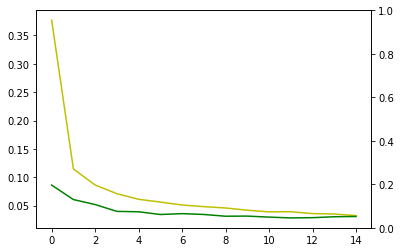

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='훈련손실')
loss_ax.plot(hist.history['val_loss'], 'g', label='검증손실')
acc_ax.plot(hist.history['acc'], 'b', label='훈련 정확도')
acc_ax.plot(hist.history['val_acc'], 'r', label='검증정확도')

plt.legend(['train acc', 'validation acc'])
plt.show()